In [123]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

# TRAIN

In [124]:
for i in range(8):
    if i==0:
        train = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
        train=pd.concat([train,temp])

In [125]:
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,wmd,CLASS
0,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0.000000,YES
1,-0.000762,3178.86960,1.584,1.412555,2609.288173,0.467034,0,5,0.478848,152.834350,NO
2,-0.280848,2433.71730,2.986,1.415133,1511.097808,1.305065,0,2,0.616979,124.536017,UNKNOWN
3,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0.000000,YES
4,-0.140882,796.06140,1.530,0.716918,293.534326,0.231184,0,0,0.037146,53.602394,YES
...,...,...,...,...,...,...,...,...,...,...,...
95,-0.019967,759.53076,2.055,0.703017,185.089419,0.424818,0,0,0.258356,105.945882,UNKNOWN
96,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0.000000,YES
97,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0.000000,UNKNOWN
98,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0.000000,NO


<Axes: title={'center': 'antonimos'}, xlabel='CLASS'>

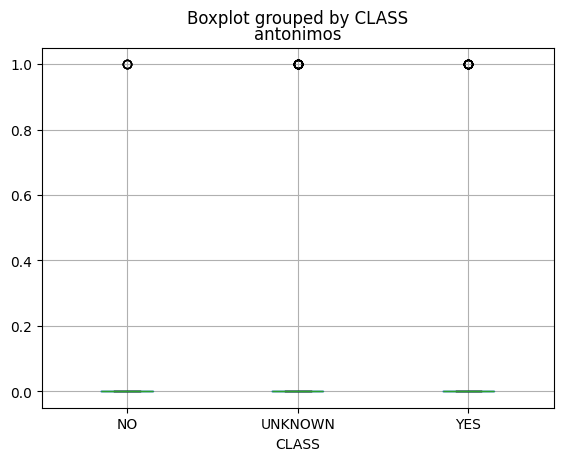

In [126]:
train.boxplot(by="CLASS",column="antonimos")

In [127]:
train=train.drop(["antonimos","sim_faltantes","distancias","suma","wmd"],axis=1)
train

,entropias,mutual_info,m_earth,max_info_p,relaciones,CLASS
0,0.000,0.000000,0.000000,0.000000,0,YES
1,1.584,1.412555,2609.288173,0.467034,5,NO
2,2.986,1.415133,1511.097808,1.305065,2,UNKNOWN
3,0.000,0.000000,0.000000,0.000000,0,YES
4,1.530,0.716918,293.534326,0.231184,0,YES
...,...,...,...,...,...,...
95,2.055,0.703017,185.089419,0.424818,0,UNKNOWN
96,0.000,0.000000,0.000000,0.000000,0,YES
97,0.000,0.000000,0.000000,0.000000,0,UNKNOWN
98,0.000,0.000000,0.000000,0.000000,0,NO


In [128]:
X = np.array(train.drop(['CLASS'],axis=1))
y_ = np.array(train['CLASS'])

In [129]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [130]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

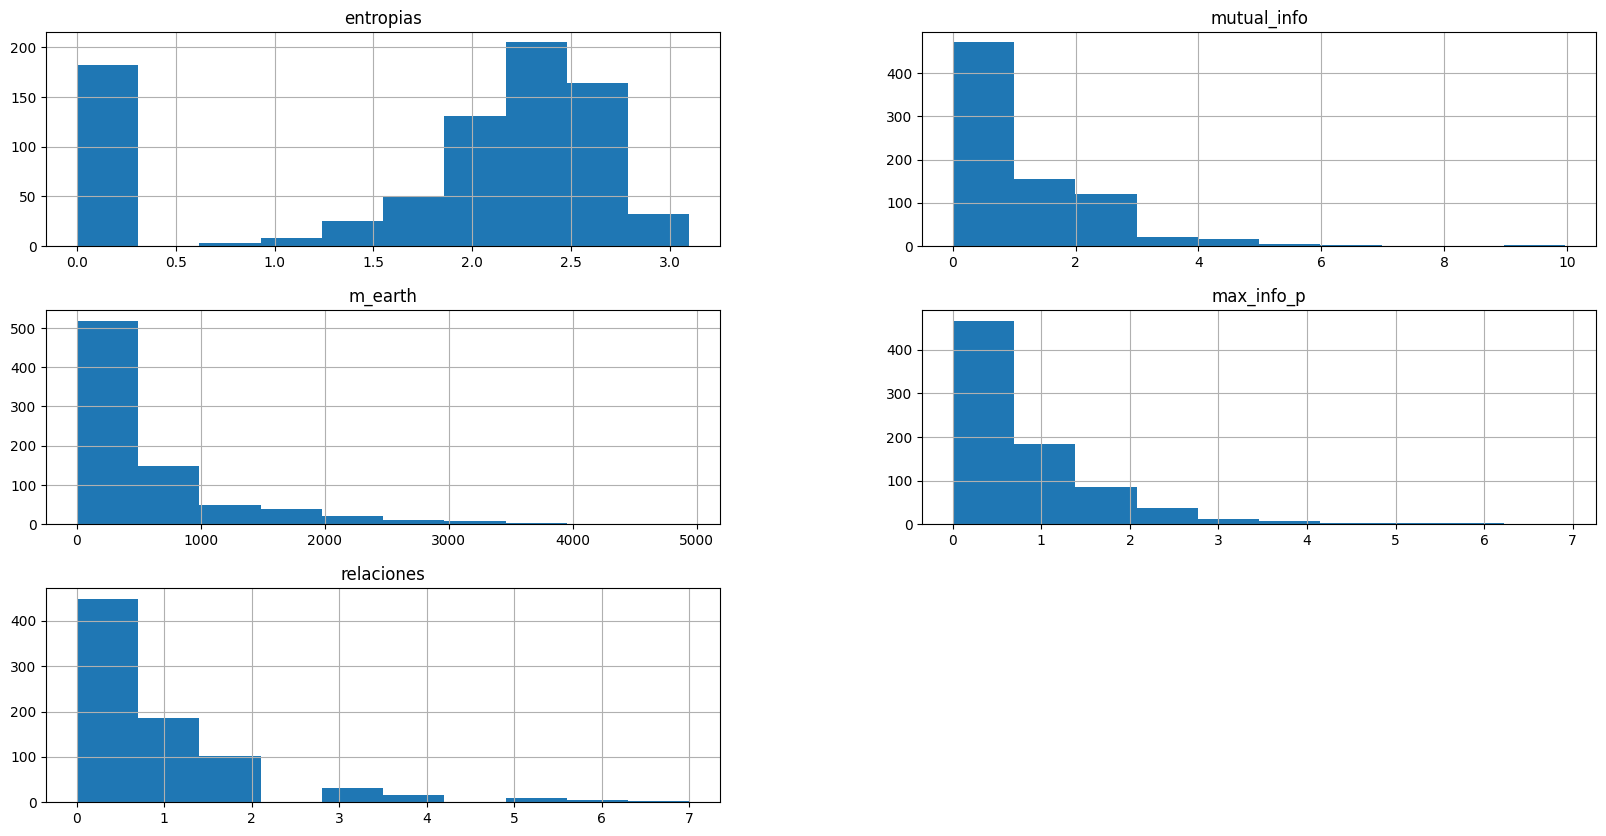

In [131]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [132]:
for i in range(8):
    if i==0:
        test = pd.read_csv('salida/resultados/GHS/GHS_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/GHS/GHS_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [133]:
test=test.drop(["antonimos","sim_faltantes","incompatibilidad","distancias","suma","wmd"],axis=1)
test

,entropias,mutual_info,m_earth,max_info_p,relaciones,CLASS
0,2.522,1.693236,548.113146,1.495413,1,ENTAILMENT
1,2.562,15.251068,2738.592257,8.985902,4,NONENTAILMENT
2,2.569,7.767979,3147.306772,4.870435,3,NONENTAILMENT
3,0.000,0.000000,0.000000,0.000000,0,ENTAILMENT
4,2.735,15.845889,18343.499258,8.569524,4,NONENTAILMENT
...,...,...,...,...,...,...
95,2.633,10.538611,3690.211301,5.458198,0,NONENTAILMENT
96,2.793,2.108088,2230.625866,1.351854,1,ENTAILMENT
97,2.642,12.651247,4477.055739,6.705415,3,NONENTAILMENT
98,2.651,9.837451,2291.209525,5.860400,5,NONENTAILMENT


In [134]:
X_t = np.array(test.drop(['CLASS'],axis=1))
y_t = np.array(test['CLASS'])

In [135]:
# GHS
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [136]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [137]:
model = linear_model.LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [138]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [139]:
model.decision_function(X)

array([ 9.25973035e-01,  8.77351137e-03,  2.97459135e-01,  9.25973035e-01,
        7.53726234e-02,  5.49755651e-01,  9.25973035e-01,  4.58745302e-01,
       -1.89617967e-02, -1.49074039e+00,  1.31698953e-01,  9.25973035e-01,
        1.65701676e-01,  3.32720738e-01,  4.45653503e-01,  9.25973035e-01,
       -1.76726425e-01,  2.81429741e-01,  3.78198008e-01,  2.96808100e-01,
        4.37251134e-01,  1.57046952e-01,  5.40180970e-01,  3.47508187e-01,
       -1.58276316e-01,  2.68167557e-01,  3.57073202e-01,  2.28902254e-01,
        2.36891642e-01,  3.27782644e-01,  3.75743558e-01,  2.50723199e-01,
        1.95594026e-01,  2.70662292e-01,  3.20812539e-01,  2.75477331e-01,
        2.55520830e-01,  4.71985005e-01,  2.50654881e-01,  9.25973035e-01,
        9.25973035e-01,  2.29915766e-01, -3.39207092e-01,  3.10868651e-01,
        4.15776593e-01,  9.25973035e-01,  2.65352914e-01,  5.20908757e-01,
        9.25973035e-01,  4.95611650e-01,  1.03873640e-01,  4.35516326e-01,
       -9.35020193e-01,  

In [140]:
labels=train.columns[:-1]
labels

Index(['entropias', 'mutual_info', 'm_earth', 'max_info_p', 'relaciones'], dtype='object')

In [141]:
model.classes_

array([0, 1])

In [142]:
model.coef_[0]

array([-0.10469691, -1.74081518,  0.20968196,  0.80258222, -0.00315652])

In [143]:
coeficientes=model.coef_[0]

In [144]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  3 max_info_p 1 mutual_info


In [145]:
n_columns=train.shape[1]-1

In [146]:
n_columns

5

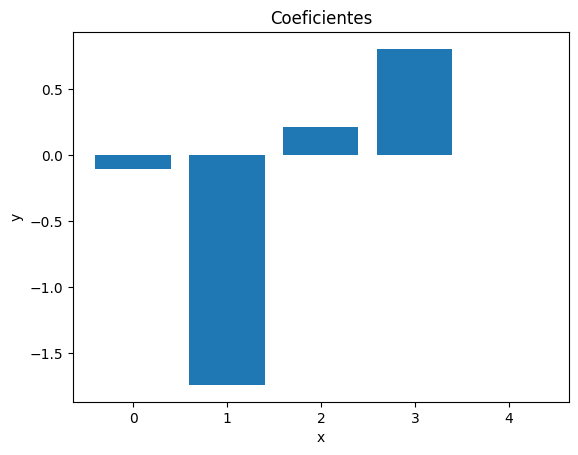

In [147]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [148]:
predictions = model.predict(X_test)

In [149]:
print(confusion_matrix(y_test, predictions))

[[332  69]
 [  1 398]]


In [150]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.91
precision:  0.85
recall 1.0
f1_score:  0.92
matthews_score:  0.84


In [151]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [152]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [153]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.750000 (0.062226)
Logistic Regression: 0.870000 (0.052795)
Logistic Regression: 0.810000 (0.052894)


In [154]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.590000 (0.100819)


In [155]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [156]:
model = linear_model.LogisticRegression().fit(X_train,y_train)

In [157]:
explainer = shap.Explainer(model,X_train)
shap_values = explainer.shap_values(X_test)

In [158]:
explainer.expected_value

-0.06859433196618234

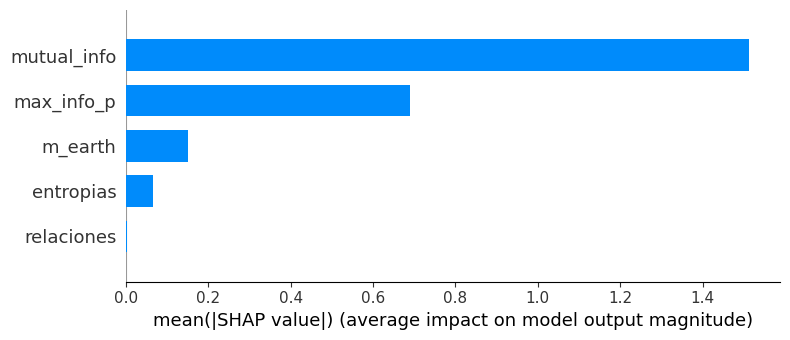

In [159]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1],plot_type="bar")